In [1]:
import pandas as pd
import numpy as np
import requests as r
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import datetime
import json
import re
import tweepy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url[len('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/'):]

response = r.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'r') as f:
        f.write(response.content)

In [5]:
image_predictions_df = pd.read_csv(file_name, sep = '\t')

In [6]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
img_urls = image_predictions_df.jpg_url

        
for url in img_urls:
    response = r.get(url)
    if not os.path.isfile(file_name):
        with open(file_name, 'r') as f:
            f.write(response.content)

In [8]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df_now = pd.DataFrame(df_list)
api_df_now.sample(10)

,favorite_count,retweet_count,tweet_id,user_count
2067,796,212,671134062904504320,3201008
2187,161,25,668967877119254528,3201014
161,24678,5698,860524505164394496,3200891
210,0,10706,851953902622658560,3200891
300,13782,2522,836677758902222849,3200891
871,5792,1669,761334018830917632,3200908
733,9428,2458,781251288990355457,3200901
112,121,3,870726314365509632,3200891
77,0,83,877611172832227328,3200892
2096,887,403,670727704916926465,3201009


In [9]:
api_df_now

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889
5,20562,3261,891087950875897856,3200889
6,12041,2158,890971913173991426,3200889
7,56848,16716,890729181411237888,3200889
8,28226,4429,890609185150312448,3200889
9,32467,7711,890240255349198849,3200889


### Define
#### Quality
- Replies are not needed.
- Retweets are not needed.
- Reply columns to be removed: in_reply_to_status_id, in_reply_to_user_id, 
- Retweets column to be removed: retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp.
- Data type for “tweet_id” is float instead of object.
- Tweets with no images are not needed.
- Column names are confusing.
- Most tweets have no dog stage.
- The three dataframes have different row numbers.


#### Tidiness
- Dog stage doesn’t have to be in different columns.
- The data being in separate dataframes makes it difficult to analyze data.


In [10]:
archive_df['tweet_id'] = archive_df['tweet_id'].astype(str)
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [11]:
image_predictions_df['tweet_id'] = image_predictions_df['tweet_id'].astype(str)
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [12]:
api_df_now['tweet_id'] = api_df_now['tweet_id'].astype(str)
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
user_count        2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [13]:
image_predictions_df_clean = image_predictions_df.copy()

In [14]:
tweets_with_image = list(image_predictions_df_clean.tweet_id.unique())

len(tweets_with_image) == image_predictions_df_clean.tweet_id.isin(tweets_with_image).sum()

image_clean = image_predictions_df_clean[image_predictions_df_clean.tweet_id.isin(tweets_with_image)]

In [15]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_clean.columns = cols

test = pd.wide_to_long(image_predictions_df, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

In [16]:
archive_df_clean = archive_df.copy()

In [17]:
retweet_entries = archive_df_clean.retweeted_status_id.notnull()
archive_df_clean[retweet_entries].shape[0]
retweet_entries.sum()

181

In [18]:
archive_df_clean = archive_df_clean[~retweet_entries]

In [19]:
reply_entries = archive_df_clean.in_reply_to_status_id.notnull()

archive_df_clean[reply_entries].shape[0]

reply_entries.sum()

78

In [20]:
archive_df_clean = archive_df_clean[~reply_entries]

In [21]:
archive_df_clean = archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id'], axis=1)

In [22]:
np.logical_not(image_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055     True
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

In [23]:
image_clean = image_clean[~np.logical_not(image_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))]

In [24]:
np.logical_not(archive_df_clean.tweet_id.isin(list(image_clean.tweet_id)))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
31      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2097, dtype: bool

In [25]:
archive_df_clean = archive_df_clean[~np.logical_not(archive_df_clean.tweet_id.isin(list(image_clean.tweet_id)))]

In [26]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: int64(2), object(10)
memory usage: 200.2+ KB


In [27]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id        1971 non-null object
jpg_url         1971 non-null object
img_num         1971 non-null int64
prediction_1    1971 non-null object
confidence_1    1971 non-null float64
breed_1         1971 non-null bool
prediction_2    1971 non-null object
confidence_2    1971 non-null float64
breed_2         1971 non-null bool
prediction_3    1971 non-null object
confidence_3    1971 non-null float64
breed_3         1971 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


In [28]:
api_df_now_clean = api_df_now.copy()

In [29]:
np.logical_not(api_df_now_clean.tweet_id.isin(list(image_clean.tweet_id)))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
2324    False
2325    False
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
Name: tweet_id, Length: 2354, dtype: bool

In [30]:
api_df_now_clean = api_df_now_clean[~np.logical_not(api_df_now_clean.tweet_id.isin(list(image_clean.tweet_id)))]

In [31]:
api_df_now_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    1971 non-null int64
retweet_count     1971 non-null int64
tweet_id          1971 non-null object
user_count        1971 non-null int64
dtypes: int64(3), object(1)
memory usage: 77.0+ KB


In [32]:
archive_df_clean.doggo = archive_df_clean.doggo.str.replace('None' ,'')
archive_df_clean.floofer = archive_df_clean.floofer.str.replace('None' ,'')
archive_df_clean.pupper = archive_df_clean.pupper.str.replace('None' ,'')
archive_df_clean.puppo = archive_df_clean.puppo.str.replace('None' ,'')

archive_df_clean['dog_stage'] = archive_df_clean['doggo'] + archive_df_clean['floofer'] + archive_df_clean['pupper'] + archive_df_clean['puppo'] 
archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'

archive_df_clean.dog_stage = archive_df_clean.dog_stage.replace('', np.nan)

archive_df_clean.head(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [33]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
dtypes: int64(2), object(7)
memory usage: 154.0+ KB


In [34]:
archive_df_clean.dog_stage.value_counts(dropna = False)

NaN              1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [35]:
full_archive = archive_df_clean.set_index('tweet_id').join(image_clean.set_index('tweet_id')).join(api_df_now.set_index('tweet_id'))
full_archive

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3,favorite_count,retweet_count,user_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,3200889
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,3200889
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,3200889
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,3200889
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,3200889
891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562,3261,3200889
890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041,2158,3200889
890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848,16716,3200889
890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226,4429,3200889


In [36]:
full_archive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 892420643555336193 to 666020888022790149
Data columns (total 22 columns):
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
prediction_1          1971 non-null object
confidence_1          1971 non-null float64
breed_1               1971 non-null bool
prediction_2          1971 non-null object
confidence_2          1971 non-null float64
breed_2               1971 non-null bool
prediction_3          1971 non-null object
confidence_3          1971 non-null float64
breed_3               1971 non-null bool
favorite_count        1971 non-null int64
retweet_count  

In [37]:
full_archive.to_csv('twitter_archive_master.csv', index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3096a9438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa308306940>]], dtype=object)

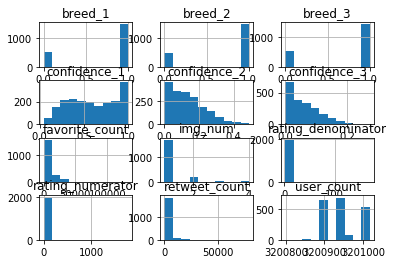

In [38]:
full_archive.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3082cfe48>]], dtype=object)

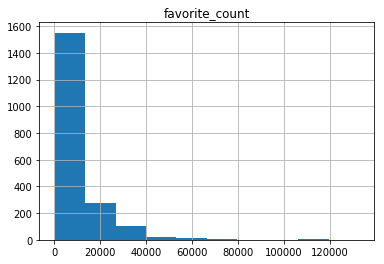

In [39]:
full_archive.hist('favorite_count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa308085e10>]], dtype=object)

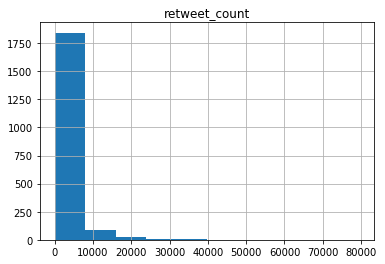

In [40]:
full_archive.hist('retweet_count')

Text(0,0.5,'Favorite Count')

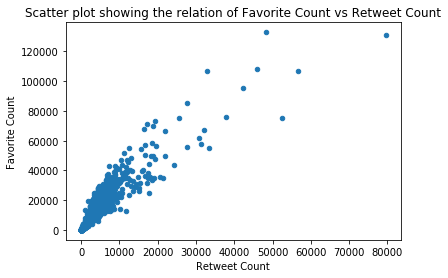

In [41]:
full_archive.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter')
plt.title('Scatter plot showing the relation of Favorite Count vs Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

Text(0,0.5,'Favorite Count')

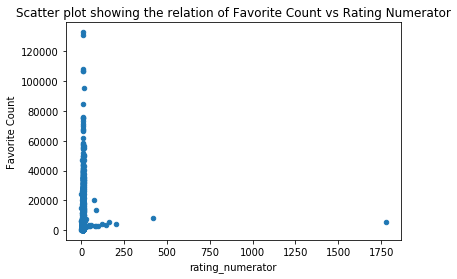

In [42]:
full_archive.plot(x = 'rating_numerator', y = 'favorite_count', kind = 'scatter')
plt.title('Scatter plot showing the relation of Favorite Count vs Rating Numerator')
plt.xlabel('rating_numerator')
plt.ylabel('Favorite Count')

In [43]:
full_archive.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

Text(0,0.5,'Favorite Count')

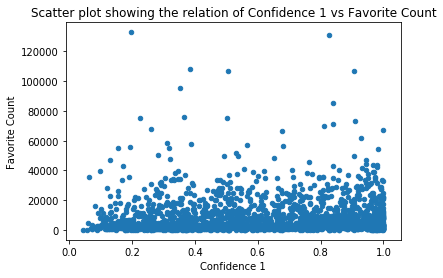

In [44]:
full_archive.plot(x = 'confidence_1', y = 'favorite_count', kind = 'scatter')
plt.title('Scatter plot showing the relation of Confidence 1 vs Favorite Count')
plt.xlabel('Confidence 1')
plt.ylabel('Favorite Count')

Text(0,0.5,'Rating Numerator')

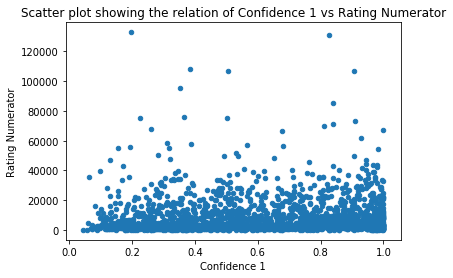

In [45]:
full_archive.plot(x = 'confidence_1', y = 'favorite_count', kind = 'scatter')
plt.title('Scatter plot showing the relation of Confidence 1 vs Rating Numerator')
plt.xlabel('Confidence 1')
plt.ylabel('Rating Numerator')